Mobile Price Classification - classify mobile price range
https://www.kaggle.com/iabhishekofficial/mobile-price-classification

In [1]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train= pd.read_csv('./train.csv')
df_train.shape

(2000, 21)

In [3]:
df_test= pd.read_csv('./test.csv')
df_test.shape

(1000, 21)

In [4]:
df_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
df_test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [6]:
dt_train_tgt=df_train['price_range']

In [7]:
dt_train_src=df_train.drop(['price_range'],axis=1)

In [8]:
#Test and Train Split
Xlr, Xtestlr, ylr, ytestlr = train_test_split(dt_train_src.values,dt_train_tgt.values,stratify=dt_train_tgt.values,test_size=0.30,random_state=20)

In [9]:
model=RandomForestClassifier(criterion='entropy')
model.fit(Xlr, ylr)

/Users/kmallick/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
model.score(Xtestlr,ytestlr)

0.81

In [11]:
n_estimators=[1,2,4,8,16,20,21,22,23,24,25,30,32,36,40]

rf_train_accuracy=[]
rf_test_accuracy=[]

for value in n_estimators:
    rf_model=RandomForestClassifier(n_estimators=value,n_jobs=1)
    rf_model=rf_model.fit(Xlr, ylr)
    rf_train_accuracy.append(rf_model.score(Xlr, ylr))
    rf_test_accuracy.append(rf_model.score(Xtestlr, ytestlr))

In [12]:
rf_df=pd.DataFrame({'esimators':n_estimators,'rf_training_score':rf_train_accuracy,'rf_test_score':rf_test_accuracy})
rf_df

,esimators,rf_training_score,rf_test_score
0,1,0.851429,0.661667
1,2,0.832143,0.531667
2,4,0.959286,0.728333
3,8,0.990000,0.780000
4,16,0.999286,0.851667
5,20,1.000000,0.828333
6,21,1.000000,0.826667
7,22,1.000000,0.808333
8,23,0.998571,0.833333
9,24,1.000000,0.838333


In [13]:
new_model=RandomForestClassifier(n_estimators=40)
new_model.fit(Xlr, ylr)
new_model.score(Xlr,ylr)

1.0

In [14]:
rf_y_predict=new_model.predict(Xtestlr)

In [15]:
rf_training_score=new_model.score(Xlr,ylr)
rf_testing_score=accuracy_score(rf_y_predict, ytestlr)
rf_testing_score

0.8566666666666667

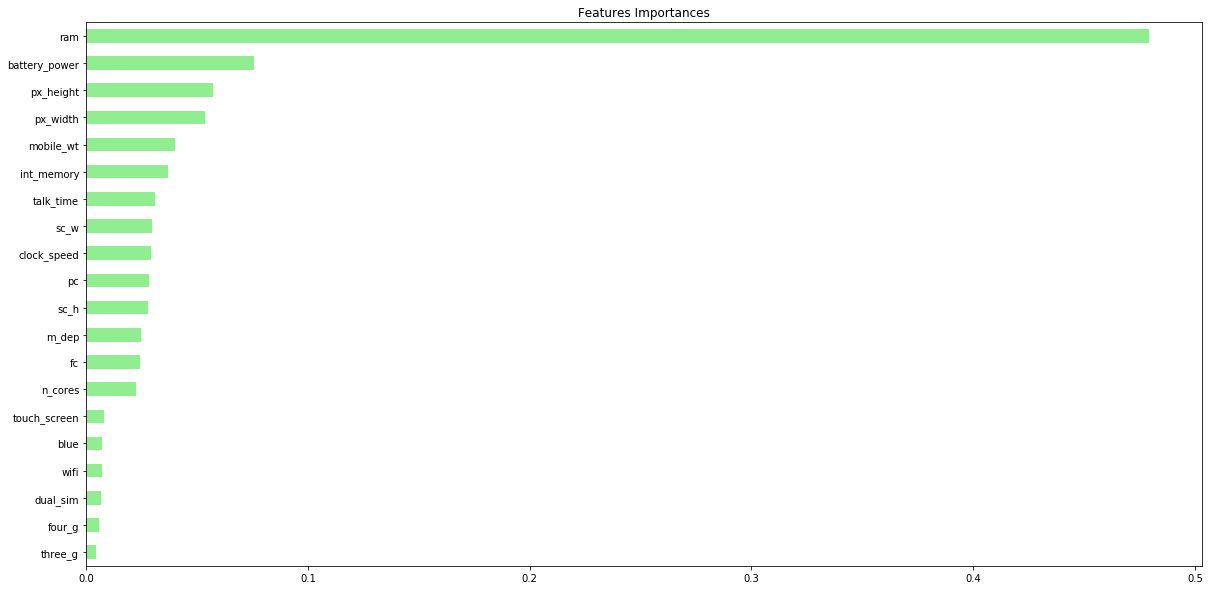

In [16]:
#importance Features

importances = pd.Series(data=new_model.feature_importances_,
                        index= dt_train_src.columns.tolist())
importances_sorted = importances.sort_values()

plt.figure(figsize=(20,10))

importances_sorted.plot(color='lightgreen', kind='barh')
plt.title('Features Importances')
plt.show()

In [17]:
df_test=df_test.drop('id',axis=1)

In [18]:
df_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [19]:
rf_test_predict=new_model.predict(df_test)

In [20]:
df_test['prediction']=rf_test_predict

In [21]:
df_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,prediction
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,2
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,3
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


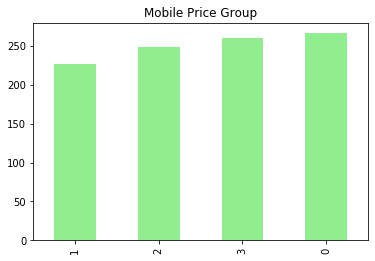

In [22]:
data=df_test.prediction.value_counts().sort_values()
data.plot(color='lightgreen', kind='bar')
plt.title('Mobile Price Group')
plt.show()